In [1]:
from numpy.linalg import inv, eig
from numpy.linalg import matrix_rank as rank
from numpy import array, eye, dot, zeros, poly, ones
from numpy import roots, arange, asarray, concatenate
from functools import reduce
import matplotlib.pyplot as plt
from control import acker, place, ss, forced_response
from control import obsv, ctrb, minreal, tf, ss2tf, tf2ss
from IPython.display import Image

def mul_mat(*args):
    return reduce(dot, args)

def plota_resp(T,
               yout,
               titulo,
               xlabel='Tempos (s)',
               ylabel='Altura da bolinha (m)\n'):

    plt.plot(T, yout)
    plt.title(titulo + '\n')
    plt.xlabel('\n' + xlabel)
    plt.ylabel(ylabel + '\n')
    plt.grid(alpha=.5)
    plt.show()
    
def plota_resp_sist(t, yout):
    
    plt.rcParams["figure.figsize"] = (11,7)
    
    fig, axes = plt.subplots(4, 1)
    ylabels = ["x1", "x1'", "x2", "x2'"]

    for num, ax in enumerate(axes.flatten()):
        ax.axhline(y=0, color='black')
        ax.plot(T, yout[num], color='b')
        ax.set_ylabel(ylabels[num])
        ax.grid()

    fig.tight_layout()
    plt.show()    
    
# plots config    
plt.rcParams["figure.figsize"] = (11,7)
plt.rcParams.update({'font.size': 15})


In [2]:

# numerador e denominador da função transferência
n = [2, 3, -4]
d = [1, -1, 3, -1]

out = tf2ss(n, d)

In [3]:
out.A.round()

matrix([[ 1.,  3., -1.],
        [-1., -0.,  0.],
        [ 0.,  1.,  0.]])

In [4]:
out.B.round()

matrix([[-1.],
        [ 0.],
        [ 0.]])

In [5]:
out.C.round()

matrix([[-2.,  3., -4.]])

In [6]:
out.D.round()

matrix([[0.]])

$$ $$
# Aula 14
$$ $$

In [7]:
# Modelo de planta utilizado
A = array([[4,  -2],
           [15, -9]])

B = array([[1, 1]]).T

C = array([1, 0])
C2 = array([[1, 0]])

D = array([0])

out = ss2tf(A,B,C,D)

sys = ss (A,B,C,D)

In [8]:
out

TransferFunction(array([1., 7.]), array([ 1.,  5., -6.]))

In [9]:
# [Ac,Bc,Cc,T] = ctrbf(A,B,C)
# [Ao,Bo,Co,T] = obsvf(A,B,C)

In [10]:
P = array([B, dot(A,B)])

In [11]:
P = P.reshape((2,2))

P

array([[1, 1],
       [2, 6]])

In [12]:
T = P

Abar = mul_mat(inv(T), A, T)
Bbar = dot(inv(T), B)
Cbar = dot(C, T)

In [13]:
Q = array([C, dot(C,A)])

T = inv(Q)

Abar = mul_mat(inv(T), A, T)
Bbar = dot(inv(T), B)
Cbar = dot(C, T)

In [14]:
iP = inv(P)

In [15]:
iP

array([[ 1.5 , -0.25],
       [-0.5 ,  0.25]])

In [16]:
iP[1,:]

array([-0.5 ,  0.25])

In [17]:
p = iP[1,:]

iPP=[p, dot(p,A)]

T = inv(iPP)

Ac = mul_mat(inv(T), A, T)

Bc = dot(inv(T), B)

Cc = dot(C, T)

In [18]:
iQ = inv(Q)

In [19]:
iQ

array([[ 1. ,  0. ],
       [ 2. , -0.5]])

In [20]:
iQ[:,1]

array([ 0. , -0.5])

In [21]:
q = iQ[:,1]

QQ = [q, dot(A,q)]

T = (QQ)

Ao = mul_mat(inv(T), A, T)

Bo = dot(inv(T), B)

Co = dot(C, T)

In [22]:
C2.shape

(1, 2)

In [23]:
C2.T

array([[1],
       [0]])

In [24]:
A

array([[ 4, -2],
       [15, -9]])

In [25]:
# Controlador com polos em s=-1 e s=-2
# Observador com polos 3x mais rápido
K = acker(A, B, [-1, -2])

eig(A - dot(B,K))

polos = array([-6, -8])

C2 = array([[1, 0]])

L = acker(A.T, C2.T, polos)
#L = acker(A.T, C.T, [-6 -8])

L = L.T

eig(A-dot(L,C2))

(array([-6., -8.]),
 matrix([[0.89442719, 0.5547002 ],
         [0.4472136 , 0.83205029]]))

In [26]:
C2

array([[1, 0]])

In [27]:
D

array([0])

In [28]:
C2.shape, D.shape

((1, 2), (1,))

In [29]:
D2 = array([[0]])

a1_ = concatenate((A, B), axis=1)
a2_ = concatenate((C2, D2), axis=1)

AA = concatenate((a1_, a2_), axis=0)


In [30]:
AA

array([[ 4, -2,  1],
       [15, -9,  1],
       [ 1,  0,  0]])

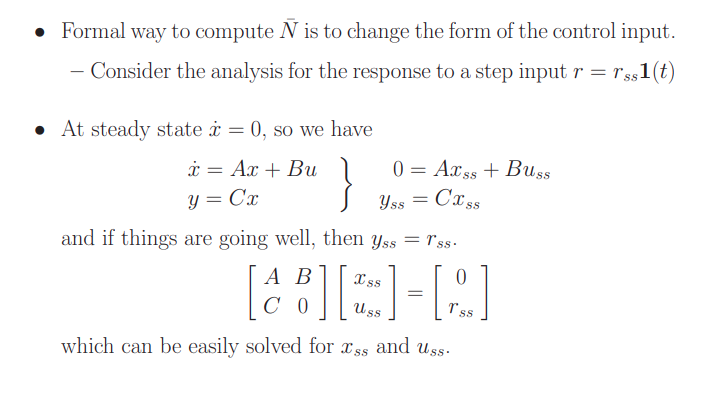

In [31]:
Image('../img/08_01.png')

In [32]:
# set point é 2
rss = 2
t = array([[0, 0, rss]]).T

t

array([[0],
       [0],
       [2]])

In [33]:
# xss -> 2x1
# uss -> 1x1
# t = [[xss], [uss]]
aux = dot(inv(AA),t)


xss = aux[0:2,:]

# valor de controle
uss = aux[2,:]

In [34]:
# x1 tem que ficar em 2 e x2 ficar em 3.14
xss

array([[2.        ],
       [3.14285714]])

In [35]:
K

matrix([[-7.5,  5.5]])

In [36]:
Nx = xss/rss
Nu = uss/rss
Nbar = Nu + dot(K,Nx)

In [37]:
Nbar = float(Nbar)

In [38]:
Nbar

0.2857142857142855

In [39]:

# construindo At
a11 = A - dot(B,K)
a12 = dot(B,K)
a21 = zeros(A.shape)
a22 = A - dot(L,C2)

a1_ = concatenate((a11, a12), axis=1)
a2_ = concatenate((a21, a22), axis=1)

Ace = concatenate((a1_, a2_), axis=0)

# construindo Bt
b11 = B*Nbar
b21 = zeros(B.shape)

Bce = concatenate((b11, b21), axis=0)

# construindo Ct
c11 = C2
c12 = zeros(C2.shape)

Cce = concatenate((c11, c12), axis=1)


In [40]:

# Ace = array([[A-dot(B,K), dot(B,K)],
#              [zeros(A.shape), A-dot(L,C2)]])

# Bce = array([B*Nbar, zeros(B.shape)])

# Cce = array([C, zeros(size(C))])

# Dce = array([0])

In [49]:
t = arange(0, 10, 0.01)

sys_est_cl = ss(Ace,Bce,Cce,D2)

x0 = [0,0,3,3]
#x0 = [0,0,0.5,0.5]

T, yout, xout = forced_response(sys=sys_est_cl, T=t, U=2, X0=x0)


In [50]:
xout.shape

(4, 1000)

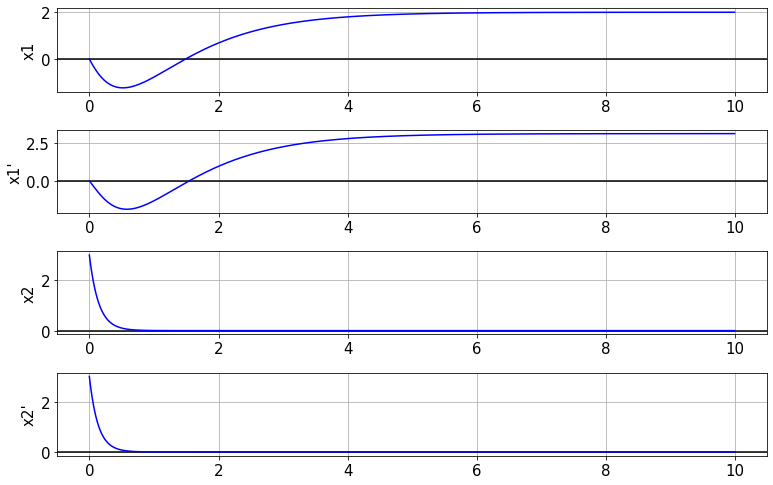

In [51]:
plota_resp_sist(T, xout)

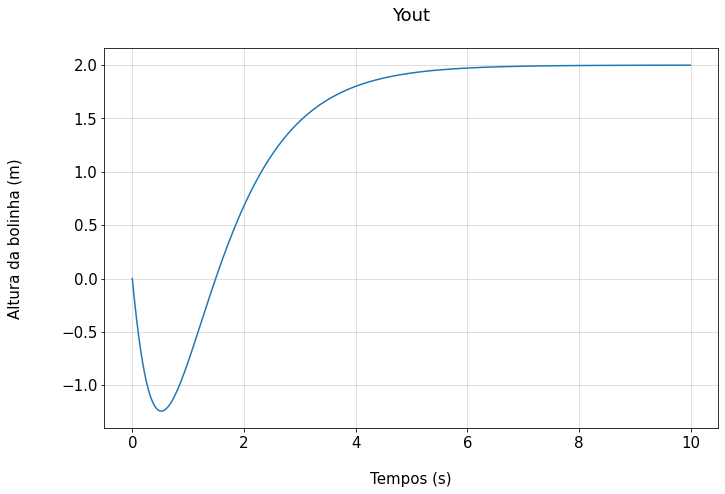

In [52]:
plota_resp(T, yout, 'Yout')